Inteligencia Artificial y Redes Neuronales

Jose de Jesus Lozano Gutierrez 1925844

Alexis Armando Iturbe Castro 1673924

Joel Adalberto Gonzalez Almaraz 1902675

Jesus Alejandro Enriquez Guajardo 2035397

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
from PIL import Image
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
import tensorflow as tf

In [2]:
!pip install kaggle

!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json #Debes subir el archivo llamado "kaggle.json" que descargaste previamente

In [3]:
!kaggle datasets download -d techsash/waste-classification-data

 98% 418M/427M [00:05<00:00, 36.0MB/s]
100% 427M/427M [00:05<00:00, 76.4MB/s]


In [4]:
!unzip waste-classification-data.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514

In [5]:
#Codigo para ver las dimenciones de las imagenes dentro de una carpeta

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/DATASET/TRAIN/O'

# Obtén la lista de archivos de imagen en la carpeta
image_files = glob.glob(folder_path + '/*.jpg')

# Itera sobre las imágenes y muestra sus dimensiones
for image_file in image_files:
    # Cargar la imagen
    image = Image.open(image_file)

    # Obtener las dimensiones de la imagen
    width, height = image.size

    # Mostrar las dimensiones de la imagen
    print(f"Imagen: {image_file} - Dimensiones: {width}x{height}")


Se han truncado las últimas 5000 líneas del flujo de salida.
Imagen: /content/DATASET/TRAIN/O/O_5458.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_8.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_6523.jpg - Dimensiones: 259x194
Imagen: /content/DATASET/TRAIN/O/O_606.jpg - Dimensiones: 310x162
Imagen: /content/DATASET/TRAIN/O/O_5369.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_9039.jpg - Dimensiones: 275x183
Imagen: /content/DATASET/TRAIN/O/O_930.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_9542.jpg - Dimensiones: 267x189
Imagen: /content/DATASET/TRAIN/O/O_3139.jpg - Dimensiones: 257x196
Imagen: /content/DATASET/TRAIN/O/O_10967.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_6933.jpg - Dimensiones: 309x163
Imagen: /content/DATASET/TRAIN/O/O_3924.jpg - Dimensiones: 300x168
Imagen: /content/DATASET/TRAIN/O/O_11409.jpg - Dimensiones: 225x225
Imagen: /content/DATASET/TRAIN/O/O_275.jpg - Dimensiones: 272x185
Image

In [6]:
#Codigo para juntar todas las carpetas de fotos en una sola carpeta

# Rutas de las cuatro carpetas que contienen las imágenes
folder1_path = '/content/DATASET/TEST/O'
folder2_path = '/content/DATASET/TEST/R'
folder3_path = '/content/DATASET/TRAIN/O'
folder4_path = '/content/DATASET/TRAIN/R'

# Ruta de la carpeta donde se guardarán las imágenes juntas
output_folder_path = '/content/Datos juntados'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder_path, exist_ok=True)

# Función para copiar imágenes de una carpeta a la carpeta de salida
def copy_images(folder_path):
    for image_file in os.listdir(folder_path):
        # Ruta completa de la imagen original
        image_path = os.path.join(folder_path, image_file)

        # Ruta completa de la imagen en la carpeta de salida
        output_path = os.path.join(output_folder_path, image_file)

        # Copiar la imagen a la carpeta de salida
        shutil.copy(image_path, output_path)

# Copiar imágenes de la primera carpeta a la carpeta de salida
copy_images(folder1_path)

# Copiar imágenes de la segunda carpeta a la carpeta de salida
copy_images(folder2_path)

# Copiar imágenes de la tercera carpeta a la carpeta de salida
copy_images(folder3_path)

# Copiar imágenes de la cuarta carpeta a la carpeta de salida
copy_images(folder4_path)



In [7]:
# Ruta de la carpeta que contiene las imágenes originales
folder_path = '/content/Datos juntados'

# Ruta de la carpeta donde se guardarán las imágenes redimensionadas
output_folder_path = '/content/Datos recortados'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder_path, exist_ok=True)

# Tamaño deseado para las imágenes (en píxeles)
target_size = (73, 73)  # Reemplaza con el tamaño deseado

# Recorrer las imágenes y subcarpetas en la carpeta
for root, dirs, files in os.walk(folder_path):
    for image_file in files:
        # Ruta completa de la imagen original
        image_path = os.path.join(root, image_file)

        # Abrir la imagen
        image = Image.open(image_path)

        # Convertir la imagen al modo RGB si es necesario
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Redimensionar la imagen
        resized_image = image.resize(target_size)

        # Ruta completa de la imagen redimensionada en la carpeta de salida
        output_path = os.path.join(output_folder_path, image_file)

        # Guardar la imagen redimensionada en la carpeta de salida
        resized_image.save(output_path)



In [8]:
#Codigo para ver las nuevas dimensiones de las imagenes recortadas

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Obtén la lista de archivos de imagen en la carpeta
image_files = glob.glob(folder_path + '/*.jpg')

# Itera sobre las imágenes y muestra sus dimensiones
for image_file in image_files:
    # Cargar la imagen
    image = Image.open(image_file)

    # Obtener las dimensiones de la imagen
    width, height = image.size

    # Mostrar las dimensiones de la imagen
    print(f"Imagen: {image_file} - Dimensiones: {width}x{height}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Imagen: /content/Datos recortados/O_10370.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_8674.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_10573.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_9944.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_1740.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_4243.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_5732.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_1696.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_6754.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_10192.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_333.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/R_8161.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_893.jpg - Dimensiones: 73x73
Imagen: /content/Datos recortados/O_12056.jpg - Dimensiones: 73x73
Imagen: /cont

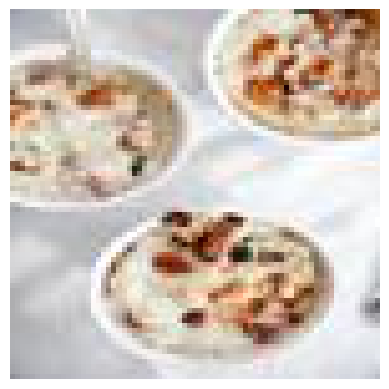

In [9]:
#Codigo para visualizar como se verian las imagenes para corroborar que todo vaya bien

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Lista para almacenar las imágenes
ImagenesdeEntrenamiento = []

# Recorrer los elementos en la carpeta y cargar solo los archivos de imagen
for item in os.listdir(folder_path):
    # Ruta completa del elemento
    item_path = os.path.join(folder_path, item)

    # Verificar si el elemento es un archivo de imagen
    if os.path.isfile(item_path):
        # Cargar la imagen
        image = Image.open(item_path)

        # Añadir la imagen a la lista
        ImagenesdeEntrenamiento.append(image)

# Mostrar la primera imagen en la lista
plt.imshow(ImagenesdeEntrenamiento[1])
plt.axis('off')  # Opcional: desactivar los ejes
plt.show()


In [10]:
#Codigo para guardar las imagenes en una variable y al mismo tiempo crearle sus etiquetas

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Lista para almacenar las imágenes
imagenes = []

# Lista para almacenar las etiquetas
etiquetas = []

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    # Ruta completa de la imagen
    image_path = os.path.join(folder_path, filename)

    # Verificar si es un archivo de imagen
    if os.path.isfile(image_path):
        # Cargar la imagen
        image = Image.open(image_path)

        # Añadir la imagen a la lista de imágenes
        imagenes.append(image)

        # Obtener la etiqueta de la imagen según el nombre del archivo
        if filename.startswith('O'):
            etiqueta = 0
        elif filename.startswith('R'):
            etiqueta = 1
        else:
            etiqueta = -1  # Asignar un valor negativo si no cumple con los casos anteriores

        # Añadir la etiqueta a la lista de etiquetas
        etiquetas.append(etiqueta)


In [11]:
etiquetas

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [ ]:
imagenes

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE362752E90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE3627522F0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE362753520>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE3627503D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE362753F70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE362752560>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE362753BE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE3608106D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE360811330>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE360811390>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE360810520>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=73x73 at 0x7BE3608103A0>,
 <PIL.JpegImageP

In [12]:
#Codigo para revisar cuantas imagenes tengo dentro de la carpeta y verificar que sean las mismas dentro de la variable

# Ruta de la carpeta que contiene las imágenes
folder_path = '/content/Datos recortados'

# Contador de imágenes
cantidad_imagenes = 0

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    # Ruta completa del archivo
    file_path = os.path.join(folder_path, filename)

    # Verificar si es un archivo de imagen
    if os.path.isfile(file_path):
        # Verificar si el archivo es una imagen válida (por extensión)
        extensiones_validas = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
        if any(filename.lower().endswith(extension) for extension in extensiones_validas):
            cantidad_imagenes += 1

print("Cantidad de imágenes:", cantidad_imagenes)


Cantidad de imágenes: 25077


In [ ]:
len(imagenes)

25077

In [13]:
len(etiquetas)

25077

In [14]:
#Normalizacion de la variable donde se encuentran las imagenes

# Crear una lista para almacenar las imágenes normalizadas
imagenes_normalizadas = []

# Normalizar los valores de píxeles dividiendo por 255.0
for imagen in imagenes:
    imagen = np.array(imagen) / 255.0
    imagenes_normalizadas.append(imagen)

# Ahora la variable `imagenes_normalizadas` contiene las imágenes normalizadas


In [15]:
del imagenes # Mi RAM estaba colapsando JAJA y elimine la variable que contenia imagenes para ver si esto liberaba RAM

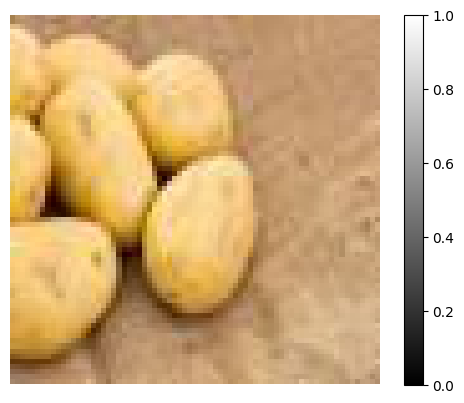

In [16]:
#Codigo para ver la escala de las imagenes ya normalizadas

# Índices de las imágenes que deseas imprimir
indices = [2]

# Iterar sobre los índices y mostrar las imágenes correspondientes
for indice in indices:
    # Obtener la imagen específica que deseas imprimir
    imagen = imagenes_normalizadas[indice]

    # Mostrar la imagen con su escala de píxeles
    plt.imshow(imagen, cmap='gray')
    plt.colorbar()
    plt.axis('off')
    plt.show()


In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes_normalizadas, etiquetas, test_size=0.3, random_state=42)

In [18]:
# Parte convolusional de la RNAC
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(73, 73, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [20]:
# Compilación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [21]:
# Convertir las listas en matrices NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Imprimir las formas de las matrices
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17553, 73, 73, 3)
y_train shape: (17553,)
X_test shape: (7524, 73, 73, 3)
y_test shape: (7524,)


In [22]:
X_train[0]

array([[[0.24313725, 0.19215686, 0.22745098],
        [0.18823529, 0.14509804, 0.16862745],
        [0.18431373, 0.16470588, 0.15294118],
        ...,
        [0.53333333, 0.58431373, 0.1372549 ],
        [0.44705882, 0.49803922, 0.08235294],
        [0.43529412, 0.47843137, 0.10980392]],

       [[0.26666667, 0.21568627, 0.25098039],
        [0.25490196, 0.21176471, 0.23529412],
        [0.27058824, 0.25098039, 0.23921569],
        ...,
        [0.52156863, 0.57254902, 0.1254902 ],
        [0.43921569, 0.49019608, 0.0745098 ],
        [0.41176471, 0.45490196, 0.08627451]],

       [[0.2627451 , 0.21176471, 0.24705882],
        [0.28627451, 0.24313725, 0.25882353],
        [0.30980392, 0.29019608, 0.27843137],
        ...,
        [0.50588235, 0.55686275, 0.10980392],
        [0.43921569, 0.48235294, 0.0745098 ],
        [0.38431373, 0.42745098, 0.05882353]],

       ...,

       [[0.99215686, 0.99215686, 0.94509804],
        [0.99215686, 0.99215686, 0.94509804],
        [0.98431373, 0

In [23]:
#Entrenamiento de la RNAC
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
549/549 [==============================] - 232s 419ms/step - loss: 0.4857 - accuracy: 0.7737 - val_loss: 0.4298 - val_accuracy: 0.8182
Epoch 2/10
549/549 [==============================] - 223s 407ms/step - loss: 0.4128 - accuracy: 0.8203 - val_loss: 0.4036 - val_accuracy: 0.8254
Epoch 3/10
549/549 [==============================] - 243s 443ms/step - loss: 0.3886 - accuracy: 0.8313 - val_loss: 0.3763 - val_accuracy: 0.8450
Epoch 4/10
549/549 [==============================] - 243s 442ms/step - loss: 0.3660 - accuracy: 0.8459 - val_loss: 0.3644 - val_accuracy: 0.8449
Epoch 5/10
549/549 [==============================] - 243s 442ms/step - loss: 0.3516 - accuracy: 0.8524 - val_loss: 0.3519 - val_accuracy: 0.8534
Epoch 6/10
549/549 [==============================] - 220s 401ms/step - loss: 0.3337 - accuracy: 0.8625 - val_loss: 0.3317 - val_accuracy: 0.8623
Epoch 7/10
549/549 [==============================] - 242s 441ms/step - loss: 0.3256 - accuracy: 0.8665 - val_loss: 0.3467 -

236/236 - 22s - loss: 0.3736 - accuracy: 0.8517 - 22s/epoch - 95ms/step


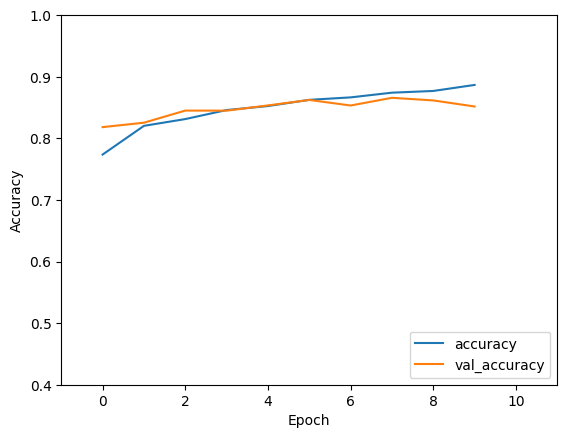

In [24]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [25]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

236/236 - 21s - loss: 0.3736 - accuracy: 0.8517 - 21s/epoch - 90ms/step

Test accuracy: 0.8516746163368225


In [26]:
predictions = model.predict(X_test)

236/236 [==============================] - 21s 90ms/step


In [27]:
predictions[0]

array([0.01313777, 0.9868622 ], dtype=float32)

In [28]:
np.argmax(predictions[0])

1

In [29]:
y_test[0]

1

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(etiquetas[predicted_label],
                                100*np.max(predictions_array),
                                etiquetas[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

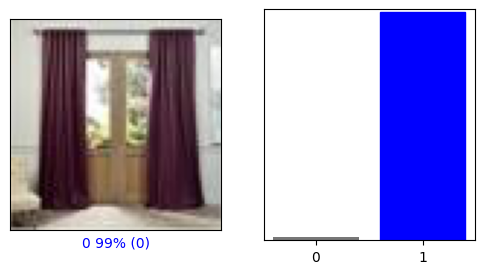

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

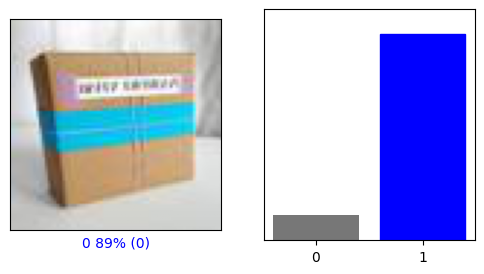

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

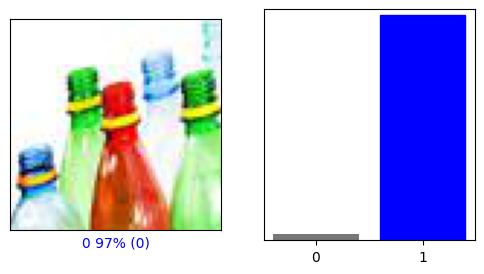

In [33]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

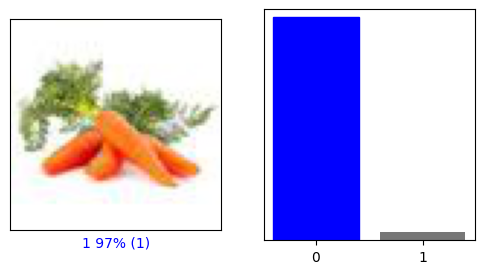

In [34]:
i = 155
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

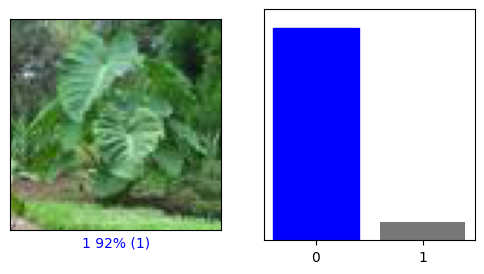

In [37]:
i = 125
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

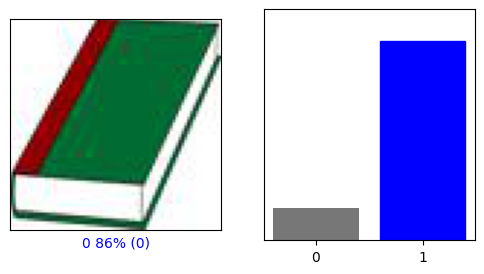

In [38]:
i = 987
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()